#SUMMARY:
This is a classic dataset used in many data mining tutorials  --  getting started with exploratory analysis and building binary classification models to predict survival.

Data covers passengers only

FEATURES:
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [230]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [231]:
df = pd.read_csv(r"C:\Users\HP\Desktop\titanic.csv",engine='python')

In [232]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
df.shape

(891, 12)

In [234]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [236]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Numerical Features : PassengerId,Age,Fare,SibSp,Parch
Categorical Features : Survived,Pclass,Name,Sex,Embarked

# MACHINE MODEL BUILDING STEPS--
#Extract Features
a. Features and target should not have null values
b. Features should be numeric
c. Features should be of the type array/dataframe
d. Features should have some rows and columns

Split the dataset into training and testing datasets
e. Features should be on the same scale

Train the model on the training dataset

Test the model on the testing dataset

In [237]:
df.drop(['Cabin','Ticket','Name','PassengerId'], axis=1, inplace=True)

In [238]:
df=pd.get_dummies(df,columns=["Embarked"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


In [239]:
df.Sex=df.Sex.map({'male':0,'female':1})

In [240]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [241]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [242]:
X[pd.isnull(X).any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,3,0,NaN,0,0,8.4583,0,1,0
17,2,0,NaN,0,0,13.0000,0,0,1
19,3,1,NaN,0,0,7.2250,1,0,0
26,3,0,NaN,0,0,7.2250,1,0,0
28,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...
859,3,0,NaN,0,0,7.2292,1,0,0
863,3,1,NaN,8,2,69.5500,0,0,1
868,3,0,NaN,0,0,9.5000,0,0,1
878,3,0,NaN,0,0,7.8958,0,0,1


In [ ]:
#We have high number of missing values in Age and Cabin columns of both Train and Test dataset.

In [243]:
X.Age.fillna(X.Age.mean(),inplace=True)

In [244]:
X[pd.isnull(X).any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


In [245]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
scaler=MinMaxScaler()

In [247]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

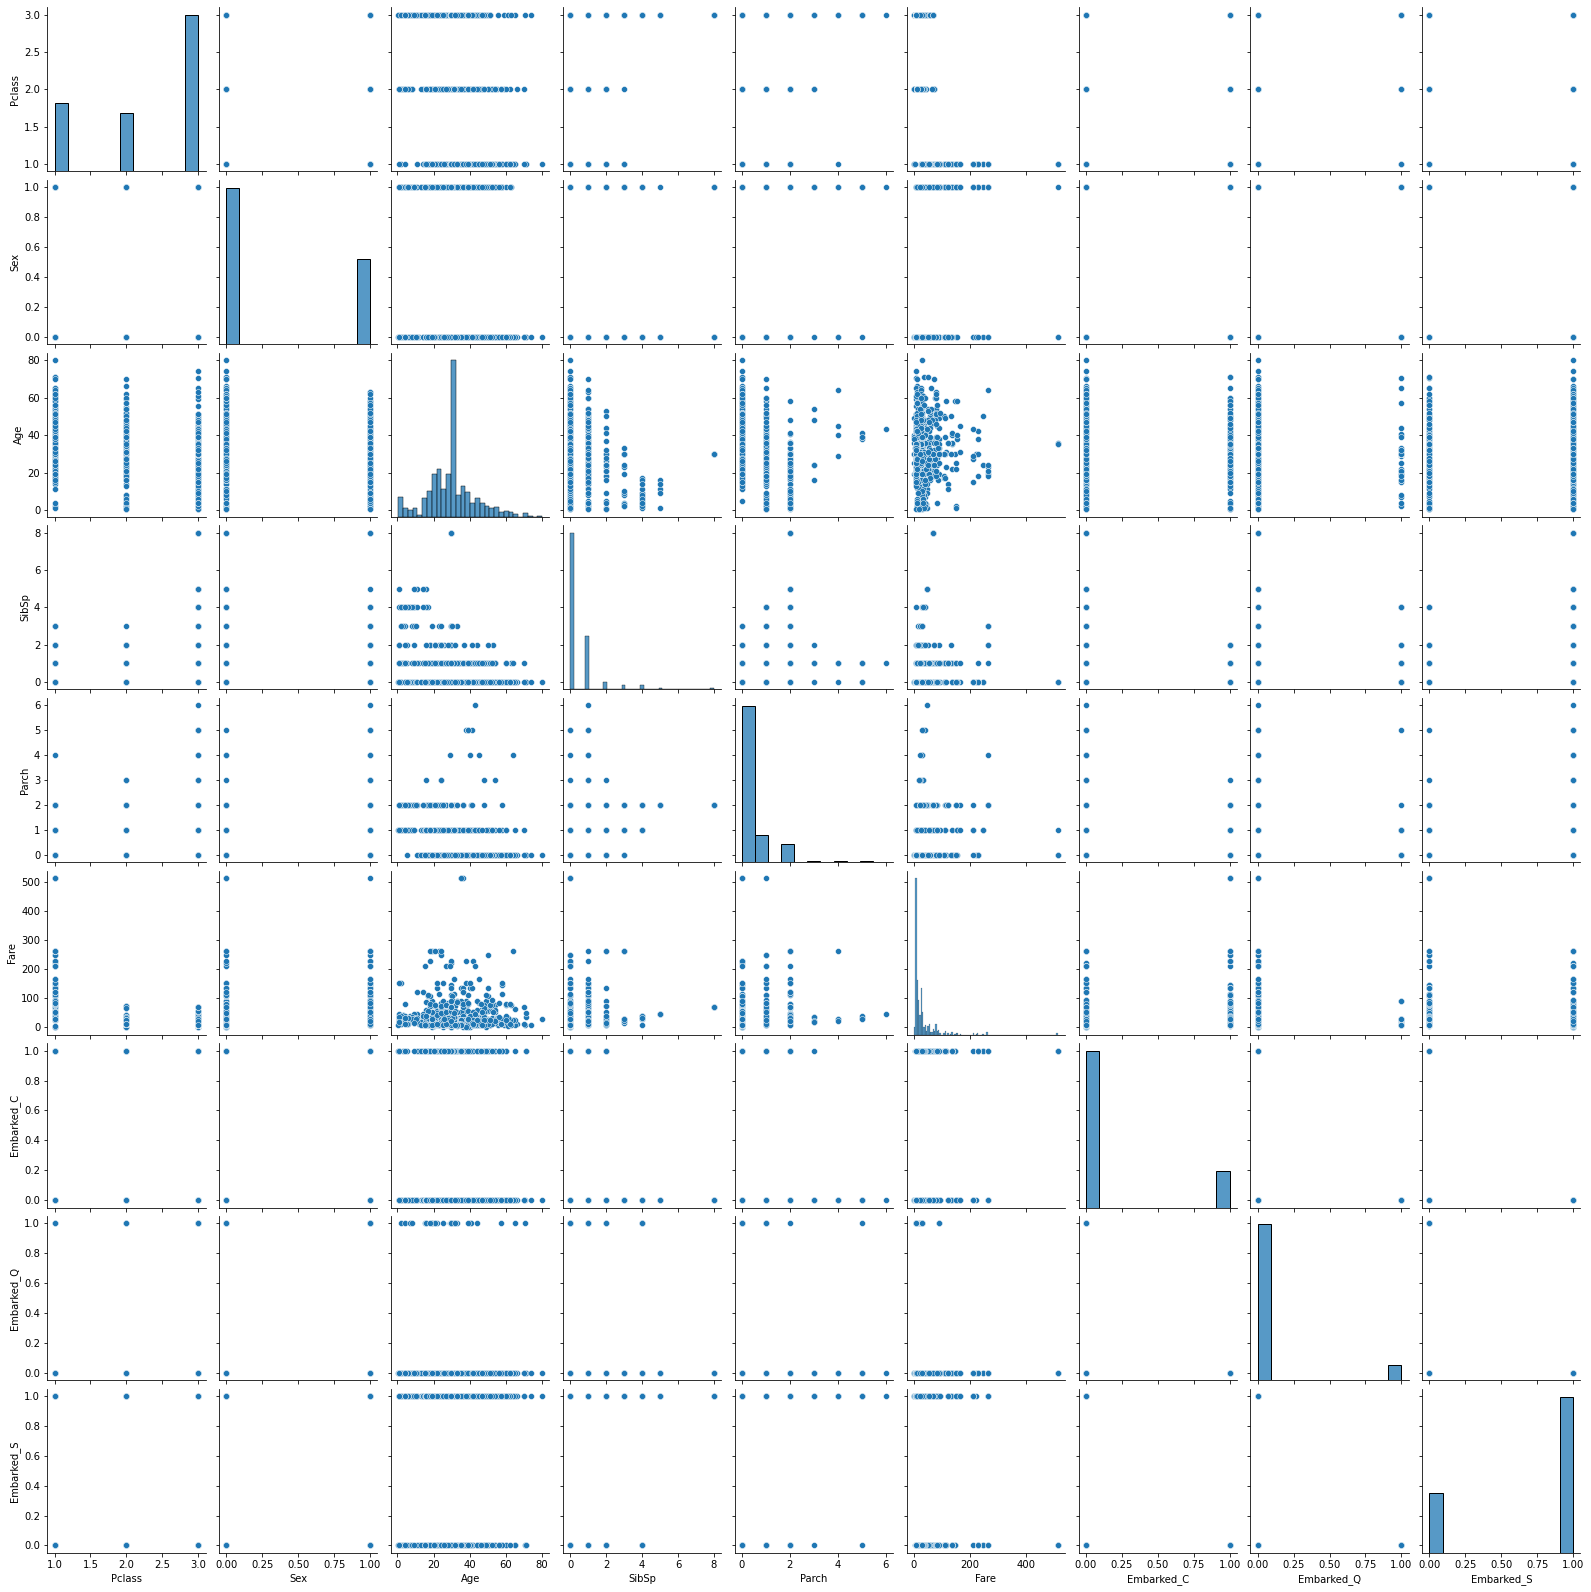

In [269]:
sns.pairplot(X)

<AxesSubplot:>

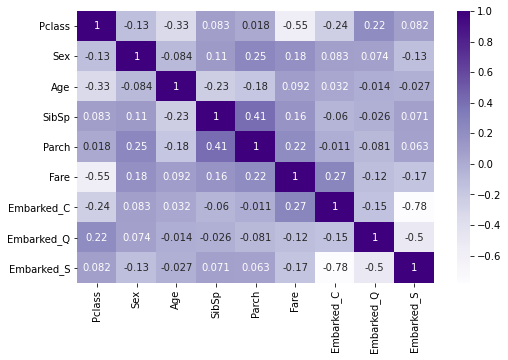

In [270]:
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(),annot=True,cmap='Purples')

Observations:

Survived is highly correlated with Fare which can be assumed that higher the fare is higher the priority given to such passengers.


<AxesSubplot:xlabel='Survived', ylabel='count'>

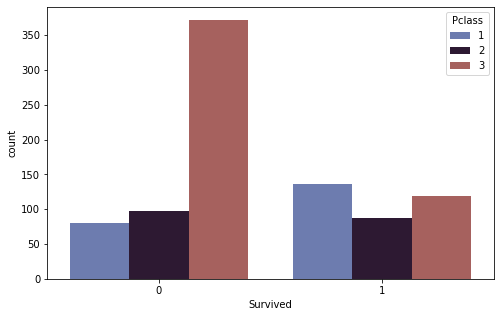

In [274]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',hue='Pclass',data=df,palette='twilight')

In [ ]:
Observations:

Survived passengers are higher in number from Pclass-1, they were evacuated first.
Passengers from Pclass-3 are higher in count who couldn't survive as they were the first to hit the water flow.

<AxesSubplot:xlabel='Sex', ylabel='count'>

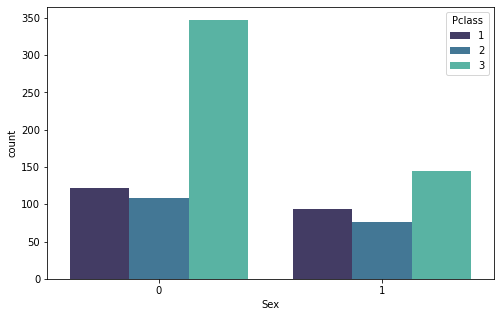

In [277]:
plt.figure(figsize=(8,5))
sns.countplot('Sex',hue='Pclass',data=df,palette='mako')

In [ ]:
Observations:

We can see more of the passengers were in Pclass-3
Passengers had high ratio of males when compared to females.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

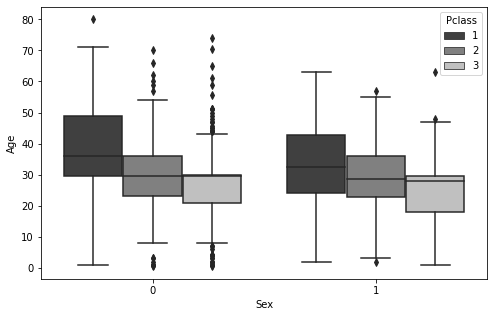

In [280]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Sex",hue="Pclass", data=X,palette='gray')

In [ ]:
Observations:

The passengers in Pclass-1 were elder than the passengers in other Pclass.
Age distribution seems to be the same in Male and Female subpopulations.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

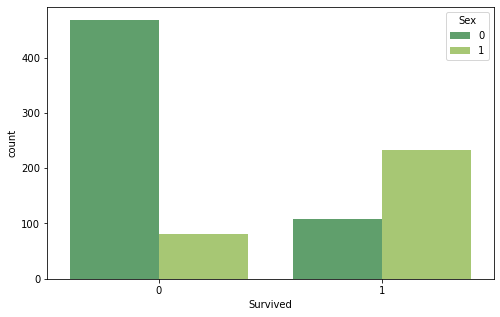

In [281]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',hue='Sex',data=df,palette='summer')

In [ ]:
Observations:

 it is evident that females were evacuated first.
There were only few men who were rescued when most of the female and children were evacuated.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

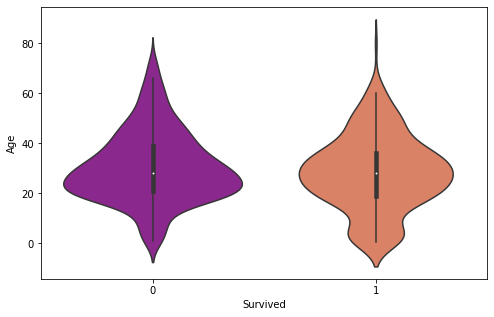

In [285]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Survived", y = "Age",data = df,palette='plasma',size=6)

In [ ]:
Observations:

The violin plot of survived passengers, we can notice that very young passengers have higher survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

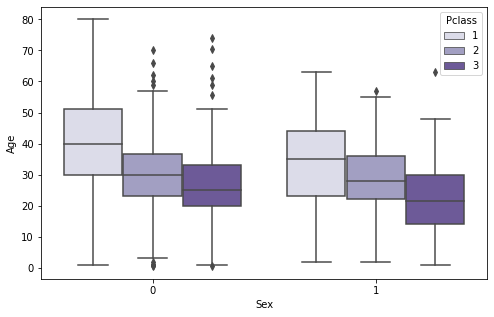

In [286]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Sex",hue="Pclass",data=df,palette='Purples')

In [ ]:
Observations:

The aged passengers are in Pclass 1 and younger in the other two Pclass.
So the older passengers were rescued first and later the younger ones.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

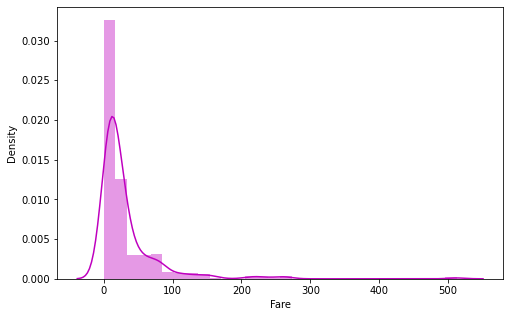

In [287]:
plt.figure(figsize=(8,5))
sns.distplot(X['Fare'],bins=30,color='m')

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [250]:
from sklearn.metrics import f1_score,roc_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

In [251]:
def evaluate_model(model):
    model.fit(X_train,y_train)
    prediction_test = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    rocauc = metrics.roc_auc_score(y_test, prediction_test)
    return accuracy,rocauc,prediction_test

In [252]:
#RANDOM FOREST CLASSIFIER
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
acc,rocauc,testpred_rf  = evaluate_model(rf)
print('Random Forest...')
Y_RFpred=rf.predict(X_test)
print(classification_report(Y_RFpred,y_test))

Random Forest...
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



(2.0, -0.1)

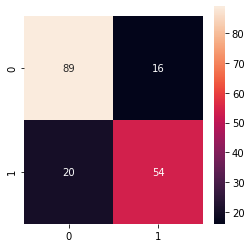

In [253]:
cm_RF = confusion_matrix(y_test, Y_RFpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_RF,annot=True,fmt="d")
ax.set_ylim(2,-0.1)


In [254]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
acc,rocauc,testpred_lr  = evaluate_model(lr)
print('Logistic Regression...')
Y_LRpred=lr.predict(X_test)
print(classification_report(Y_LRpred,y_test))

Logistic Regression...
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(2.0, -0.1)

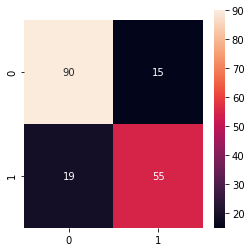

In [255]:
cm_LR = confusion_matrix(y_test, Y_LRpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_LR,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [256]:
#GAUSSIAN  MULTINOMIAL NB
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
predmnb=mnb.predict(X_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7262569832402235
[[92 13]
 [36 38]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.51      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



(2.0, -0.1)

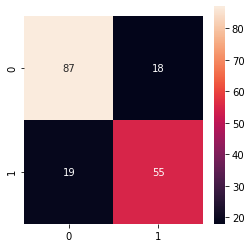

In [257]:
cm_GNB = confusion_matrix(y_test, Y_GNBpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_GNB,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [258]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6256983240223464
[[103   2]
 [ 65   9]]
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       105
           1       0.82      0.12      0.21        74

    accuracy                           0.63       179
   macro avg       0.72      0.55      0.48       179
weighted avg       0.70      0.63      0.53       179



(2.0, -0.1)

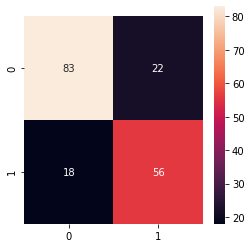

In [259]:
cm_SVC = confusion_matrix(y_test, Y_SVCpred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_SVC,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

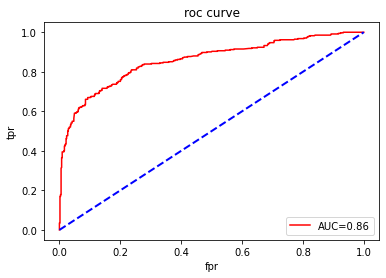

In [260]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=lr.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

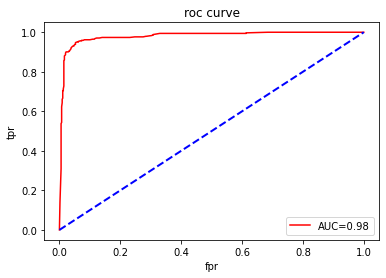

In [261]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=rf.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

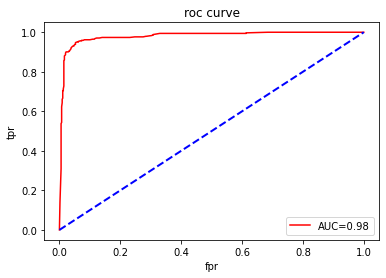

In [262]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=rf.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

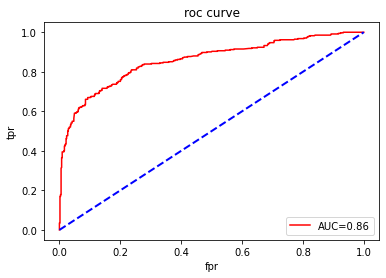

In [263]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=lr.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

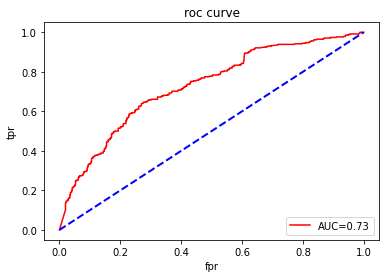

In [264]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
preds=mnb.predict_proba(X)[:,1]
fpr,tpr,thershold=roc_curve(y,preds,drop_intermediate=False)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'r',label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.legend(loc='lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.show()

In [265]:
# Predicted values
y_head_lr = lr.predict(X_test)
y_head_svc = svc.predict(X_test)
y_head_mnb = gnb.predict(X_test)
y_head_rf = rf.predict(X_test)

In [266]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_mnb = confusion_matrix(y_test,y_head_mnb)

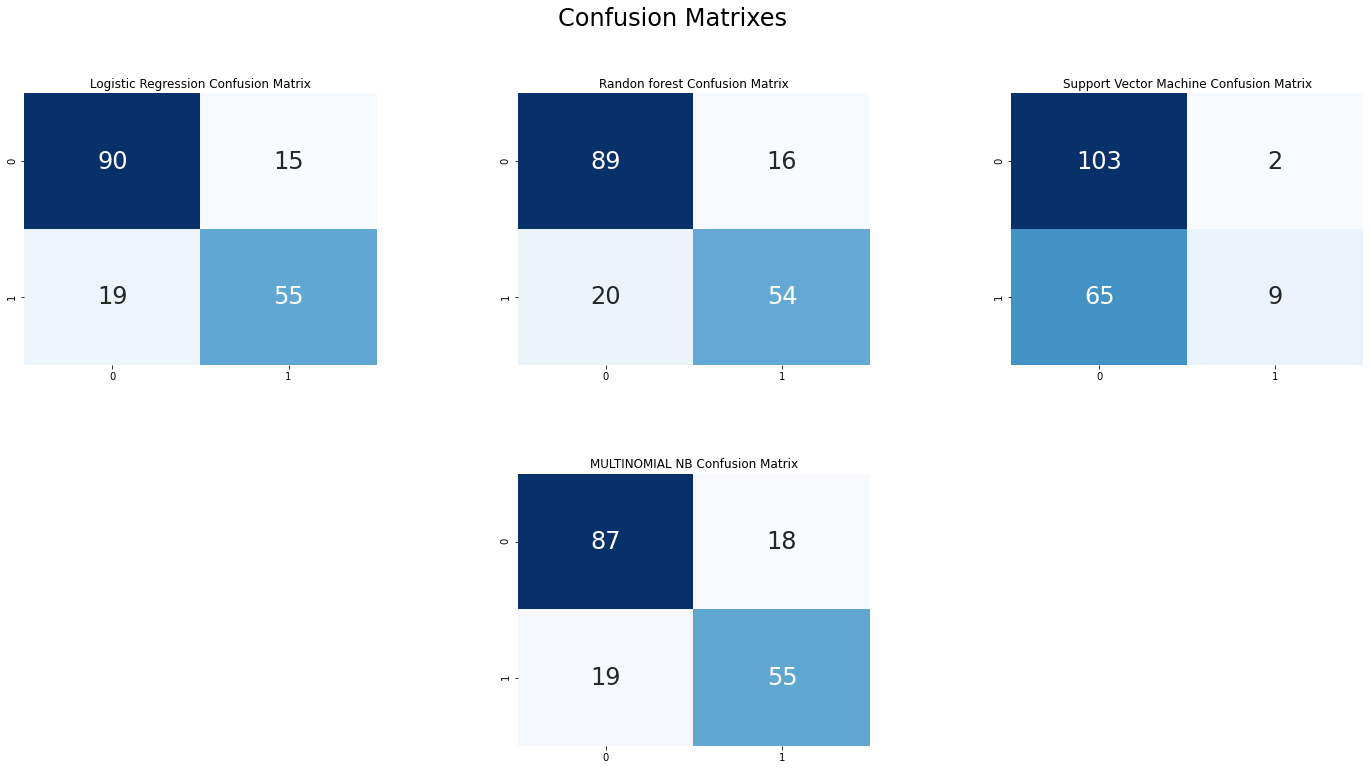

In [267]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Randon forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,5)
plt.title("MULTINOMIAL NB Confusion Matrix")
sns.heatmap(cm_mnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [268]:
#ABOVE SHOWS THAT LINEAR REGRESSION WILL HAVE MAXIMUM ACCURACY,0.98 AUC score and 0.81 accuracy.